In [1]:
import numpy as np
import pandas as pd
import networkx as nx
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob

In [23]:
import sys
import colorama


class print_line:
    def __init__(self):
        colorama.init(convert=True)
        self.start = 0
        self.end = 0
        pass
    def line(self, strings, line_no=0):
        strings = strings.split('\n')
        if line_no==-1 or line_no>=self.end:
            line_no = self.end
        else:
            for i in range(self.end-line_no):
                print("\033[A", end='',flush=True)
                sys.stdout.flush()
        for string in strings:
            print(string, end='\n', flush=True)
            line_no += 1
        self.end = line_no
        return
        

In [24]:
primes = [2,3,5,7]
count = {prime:0 for prime in primes}
prmt = print_line()
for i in range(1,11):
    for j,prime in enumerate(primes):
        if i%prime==0:
            count[prime] += 1
            prmt.line(f"{prime}:{count[prime]}",j)
            
            
            

2:1
3:1
2:2
5:1
2:3
3:2
7:1
2:4
3:3
2:5
5:2


In [67]:
df = pd.read_csv("superdata_parsed_16414.csv")

In [70]:
df2 = df[df["Critical Temperature"]>0.0].reset_index()

In [71]:
df2.head()

index              Compound  Critical Temperature  \
0      3                Bi1Li1                2.4625   
1      4  Sm0.9La0.9Sr0.2Cu1O4               34.0000   
2      5     Lu2.5Sc2.5Ir4Si10                7.9150   
3      6    Bi2Sr2Ca1Cu2O8.195               91.0000   
4      8         Nb3Al0.7Ge0.3               19.9000   

                                         Composition   Nd   Er   Se   Tm   Sb  \
0                         [('Bi', 1.0), ('Li', 1.0)]  0.0  0.0  0.0  0.0  0.0   
1  [('Sm', 0.9), ('La', 0.9), ('Sr', 0.2), ('Cu',...  0.0  0.0  0.0  0.0  0.0   
2  [('Lu', 2.5), ('Sc', 2.5), ('Ir', 4.0), ('Si',...  0.0  0.0  0.0  0.0  0.0   
3  [('Bi', 2.0), ('Sr', 2.0), ('Ca', 1.0), ('Cu',...  0.0  0.0  0.0  0.0  0.0   
4            [('Nb', 3.0), ('Al', 0.7), ('Ge', 0.3)]  0.0  0.0  0.0  0.0  0.0   

     F  ...   Ce   Ge   Pd   Dy   As   Th   Am   Cs   Np   Po  
0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  ...  0.0  0.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 91 columns]

In [72]:
def connected_elements(elems):
    elems = eval(elems)
    elem_edges = []
    
    for i,elem1 in enumerate(elems):
        for elem2 in elems[:i]:
            elem_edges.append((elem1[0],elem2[0]))
    return elem_edges

In [73]:
df2["Connected Elements"] = df2["Composition"].apply(connected_elements)

In [89]:
all_conn_elems = []
for list_ in df2["Connected Elements"].tolist():
    all_conn_elems += list_

In [96]:
elems = set()
[[elems.update([el]) for el in comp] for comp in all_conn_elems]
elems = list(elems)
len(elems)

85

In [98]:
elems_b = []
elems_x = []
for elem in elems:
    df2[elem+"_b"] = (df2[elem]>0).astype(bool)
    elems_b.append(elem+"_b")
    df2[elem+"_x"] = df2[elem]/np.sum(df2[elems],axis=1)
    elems_x.append(elem+"_x")

In [99]:
data_maxTc = df2.sort_values(by=["Critical Temperature"]).copy()
indexNames = data_maxTc[data_maxTc.duplicated(subset=elems_b,keep="last")].index
data_maxTc = data_maxTc.drop(indexNames)
data_maxTc = data_maxTc.sample(frac=1).reset_index(drop=True)
print("Initial data points :", df2.shape[0])
print("remaining data points :", data_maxTc.shape[0])

Initial data points : 12448
remaining data points : 3075


In [102]:
maxTc_conn_elems = []
for list_ in data_maxTc["Connected Elements"].tolist():
    maxTc_conn_elems += list_
graph = nx.Graph(maxTc_conn_elems)

<IPython.core.display.Javascript object>


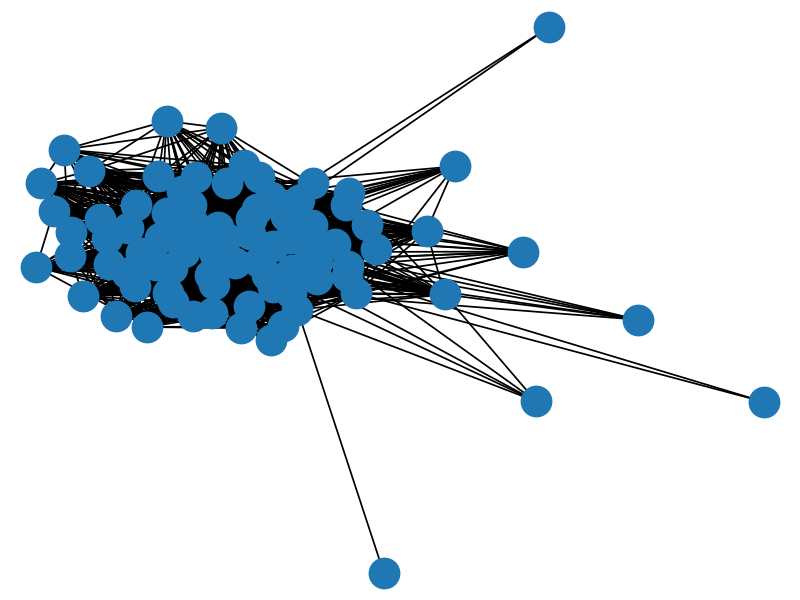

In [103]:
plt.figure()
nx.draw(graph)

<IPython.core.display.Javascript object>


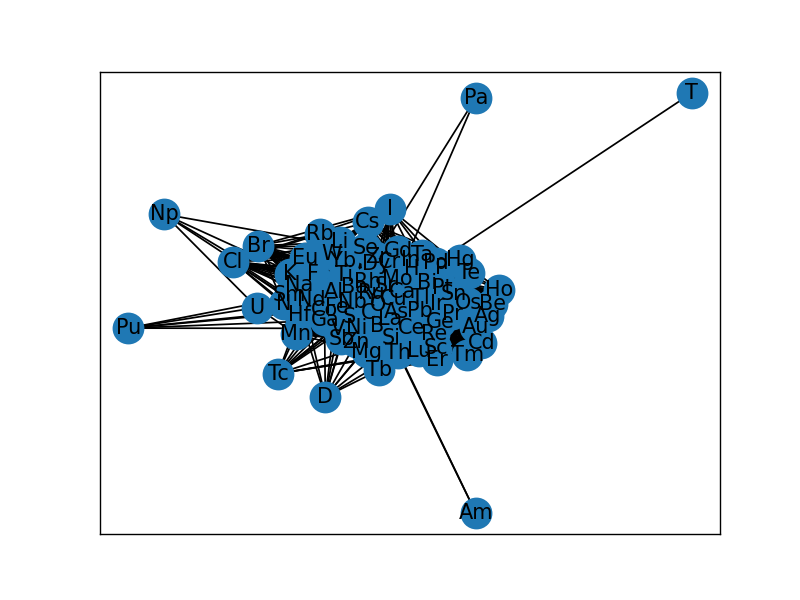

In [104]:
plt.figure()
nx.draw_networkx(graph)

<IPython.core.display.Javascript object>


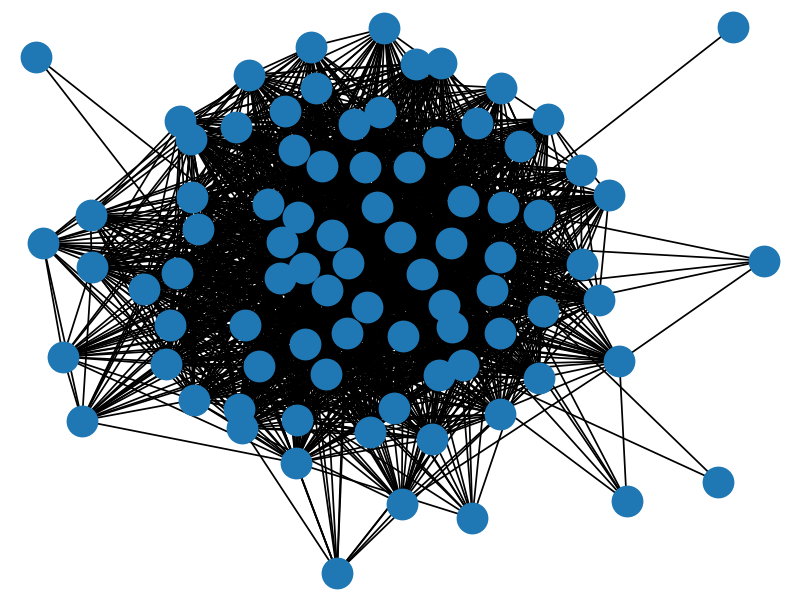

In [105]:
plt.figure()
nx.draw_kamada_kawai(graph)

<IPython.core.display.Javascript object>


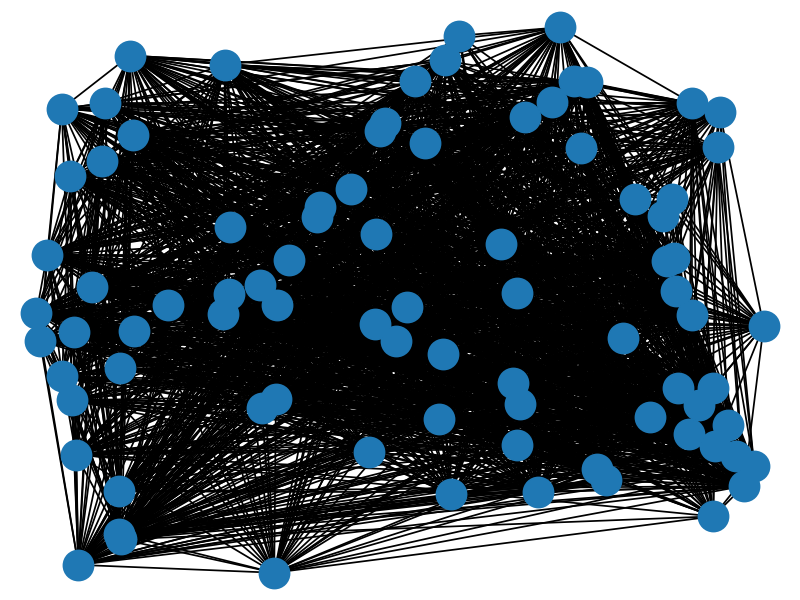

In [106]:
plt.figure()
nx.draw_random(graph)

<IPython.core.display.Javascript object>


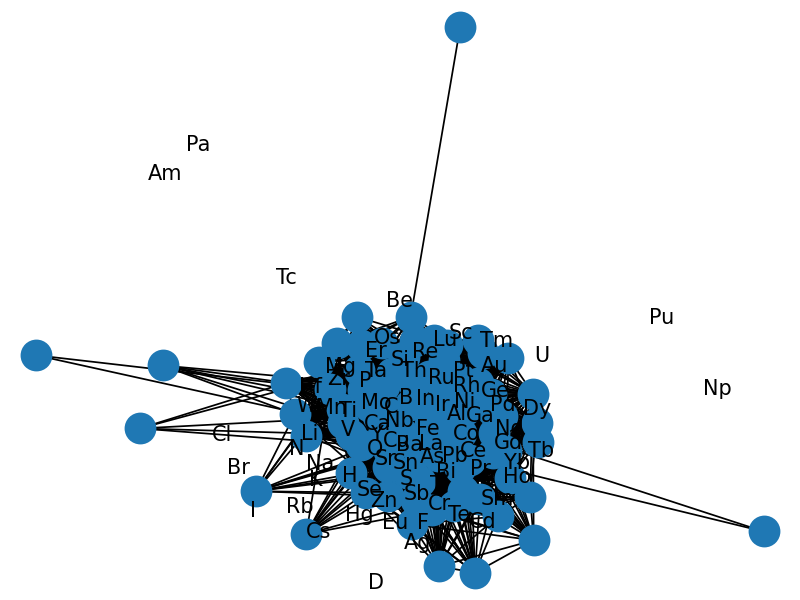

In [198]:
plt.figure()
nx.draw_spring(graph)
labels=nx.draw_networkx_labels(graph,pos=nx.spring_layout(graph))

In [203]:
import altair as alt
import nx_altair as nxa

In [218]:
help(nxa.draw_networkx)

Help on function draw_networkx in module nx_altair.draw_altair:

draw_networkx(G=None, pos=None, chart=None, nodelist=None, edgelist=None, node_size=300, node_color='red', node_label=None, font_color='black', font_size=15, alpha=1, cmap=None, linewidths=1.0, width=1, arrow_width=2, arrow_length=0.1, edge_color='black', arrow_color='black', node_tooltip=None, edge_tooltip=None, edge_cmap=None)
    Draw the graph G using Altair.
    
    nodelist : list, optional (default G.nodes())
       Draw only specified nodes
    
    edgelist : list, optional (default=G.edges())
       Draw only specified edges
    
    node_size : scalar or array, optional (default=300)
       Size of nodes.  If an array is specified it must be the
       same length as nodelist.
    
    node_color : color string, or array of floats, (default='r')
       Node color. Can be a single color format string,
       or a  sequence of colors with the same length as nodelist.
       If numeric values are specified they w

In [201]:
pos = nx.spring_layout(graph)
chart = nxa.draw_networkx(graph,
                          pos=pos,
                          node_size=200,
                          cmap='viridis',
                          node_tooltip=['name'])

In [205]:
edges = chart.layer[0]
nodes = chart.layer[1]

In [226]:
columns = ["Nodes","Edges out","Node weight"]
graph_df = pd.DataFrame(columns=columns)
count = 0
for node in graph.nodes:
    graph_df.loc[count,"Nodes"] = node
    graph_df.loc[count,"Edges out"] = graph.edges(node)
    graph_df.loc[count,"Node weight"] = len(graph.edges(node))
    
    count+=1
#     print(node)
#     print(graph.edges(node))

In [227]:
graph_df.to_csv("Graph_connected_Elements.csv",index=None)

In [178]:
pos = nx.spring_layout(graph)

In [199]:
viz = nxa.draw_networkx(
    graph, pos=pos, 
)
viz.interactive()

alt.LayerChart(...)

In [116]:
graph.number_of_nodes(),graph.number_of_edges()

(85, 2002)

In [122]:
df2.loc[1,elems_b]

Ir_b    False
Rb_b    False
Am_b    False
Th_b    False
Co_b    False
        ...  
Ba_b    False
Cu_b     True
F_b     False
Pd_b    False
Ru_b    False
Name: 1, Length: 85, dtype: object

In [129]:
elems_in = [elem+"_in" for elem in elems]
elems_out = [elem+"_out" for elem in elems]

In [158]:
import time
chembedding = pd.DataFrame(columns=elems_in+elems_out)
count = 0
tStart = time.time()
for row in range(len(df2)):
    elio = [elems[i] for i,x in enumerate(df2.loc[row,elems_b]) if x]
    tThis = time.time()
    for eli in elio:
        chembedding.loc[count,elems_in] = (df2.loc[row,elems_x]*0).tolist()
        chembedding.loc[count,eli+"_in"] = float(df2.loc[row,eli+"_x"])
        chembedding.loc[count,elems_out] = (df2.loc[row,elems_x]).tolist()
        chembedding.loc[count,eli+"_out"] = 0.0
        count+=1
    print(f"\r({row+1})=>({count}): {time.time()-tStart:.2f} s, {time.time()-tThis:.2f} s, {(time.time()-tStart)/(row+1):.2f} s - {elio}", end='               ', flush=True)

(12448)=>(47693): 3173.38 s, 0.35 s, 0.25 s - ['Mo', 'C', 'Hf']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [159]:
chembedding.to_csv("chembedding.csv",index=None)

In [160]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [166]:
class elem2vec_model(tf.keras.Model):
    def __init__(self, 
                 inout_shape=87, 
                 hidden_layers=[], 
                 neck_shape=2, 
                 hidden_activations=[], 
                 mid_activation='linear', 
                 out_activation='relu'
                ):
        super(elem2vec_model, self).__init__()
        self.hidden_down = []
        for i,(layer,activation) in enumerate(zip(hidden_layers,hidden_activations)):
            self.hidden_down.append( Dense( layer, activation=activation, name = 'down-'+str(i) ) )
        self.middle_layer = Dense( neck_shape, activation=mid_activation, name = 'middle' )
        self.hidden_up = []
        for i,(layer,activation) in enumerate(zip(hidden_layers[::-1],hidden_activations[::-1])):
            self.hidden_up.append( Dense( layer, activation=activation, name = 'up-'+str(i) ) )
        self.output_layer = Dense( inout_shape, activation=out_activation, name='output' )
        
        # return self
    def call(self, inputs, training=False):
        x = [inputs]
        for i, layer in enumerate(self.hidden_down):
            x.append( self.hidden_down[i]( x[-1] ) )
        x.append( self.middle_layer( x[-1] ) )
        for i, layer in enumerate(self.hidden_up):
            x.append( self.hidden_up[i]( x[-1] ) )
        x.append( self.output_layer( x[-1] ) )
        return x[-1]
    def get_middle_layer_output(self, inputs, training=False):
        x = [inputs]
        for i, layer in enumerate(self.hidden_down):
            x.append( self.hidden_down[i]( x[-1] ) )
        x.append( self.middle_layer( x[-1] ) )
        return x[-1]
        

In [167]:
model = elem2vec_model(inout_shape=len(elems),
                       neck_shape=10,
                       hidden_layers=[],
                       hidden_activations=[],
                       mid_activation='linear',
                       out_activation='linear'
                      )

In [168]:
model.build(input_shape=(None,len(elems)))

In [169]:
model.summary()

Model: "elem2vec_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
middle (Dense)               multiple                  860       
_________________________________________________________________
output (Dense)               multiple                  935       
Total params: 1,795
Trainable params: 1,795
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.compile(
    optimizer="adam",
    loss='mse',
    metrics=['accuracy'],
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
)

In [172]:
train_val = (len(chembedding)*90)//100
history = model.fit(
    chembedding.loc[:train_val, elems_in].astype(float),
    chembedding.loc[:train_val, elems_out].astype(float),
    batch_size=64,
    epochs=200,
    validation_data=(chembedding.loc[train_val:, elems_in].astype(float),
                     chembedding.loc[train_val:, elems_out].astype(float)),
    verbose=2
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
)

Epoch 1/200
671/671 - 2s - loss: 0.0026 - accuracy: 0.4210 - val_loss: 0.0024 - val_accuracy: 0.4400
Epoch 2/200
671/671 - 1s - loss: 0.0024 - accuracy: 0.4644 - val_loss: 0.0024 - val_accuracy: 0.4535
Epoch 3/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4705 - val_loss: 0.0024 - val_accuracy: 0.4514
Epoch 4/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4710 - val_loss: 0.0024 - val_accuracy: 0.4553
Epoch 5/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4732 - val_loss: 0.0024 - val_accuracy: 0.4535
Epoch 6/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4749 - val_loss: 0.0024 - val_accuracy: 0.4593
Epoch 7/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4756 - val_loss: 0.0024 - val_accuracy: 0.4604
Epoch 8/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4758 - val_loss: 0.0024 - val_accuracy: 0.4595
Epoch 9/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4757 - val_loss: 0.0024 - val_accuracy: 0.4612
Epoch 10/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4764 - val_loss: 0.0024 - val_accura

Epoch 82/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4717 - val_loss: 0.0024 - val_accuracy: 0.4497
Epoch 83/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4709 - val_loss: 0.0024 - val_accuracy: 0.4520
Epoch 84/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4713 - val_loss: 0.0024 - val_accuracy: 0.4558
Epoch 85/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4715 - val_loss: 0.0024 - val_accuracy: 0.4543
Epoch 86/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4711 - val_loss: 0.0024 - val_accuracy: 0.4560
Epoch 87/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4713 - val_loss: 0.0024 - val_accuracy: 0.4530
Epoch 88/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4718 - val_loss: 0.0024 - val_accuracy: 0.4522
Epoch 89/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4717 - val_loss: 0.0024 - val_accuracy: 0.4577
Epoch 90/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4703 - val_loss: 0.0024 - val_accuracy: 0.4556
Epoch 91/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4713 - val_loss: 0.0024 - v

Epoch 162/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4715 - val_loss: 0.0024 - val_accuracy: 0.4535
Epoch 163/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4714 - val_loss: 0.0024 - val_accuracy: 0.4537
Epoch 164/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4714 - val_loss: 0.0024 - val_accuracy: 0.4528
Epoch 165/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4712 - val_loss: 0.0024 - val_accuracy: 0.4549
Epoch 166/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4708 - val_loss: 0.0024 - val_accuracy: 0.4541
Epoch 167/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4713 - val_loss: 0.0024 - val_accuracy: 0.4516
Epoch 168/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4716 - val_loss: 0.0024 - val_accuracy: 0.4539
Epoch 169/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4713 - val_loss: 0.0024 - val_accuracy: 0.4537
Epoch 170/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4712 - val_loss: 0.0024 - val_accuracy: 0.4547
Epoch 171/200
671/671 - 1s - loss: 0.0023 - accuracy: 0.4714 - val_loss: 